In [157]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [235]:
# Create a session (to avoid redirecting loop with requests.get())
s = requests.Session()
s.headers['User-Agent'] = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/34.0.1847.131 Safari/537.36'

In [237]:
Local=[]
Price=[]
Surf=[]
Nb_Pieces=[]
Nb_Chambres=[]
Description=[]
Imgs_Scr=[]

url = "https://www.pap.fr/annonce/vente-appartements-ile-de-france-g471"
nP=300
#print(url)
for p in range(1,nP):
    
    liencourant = url + "?page=" +str(p) 
    r = s.get(liencourant)
    soup = BeautifulSoup(r.text, 'html.parser')
    
    annonces=soup.find_all("div", attrs={"class": "item-body"})
    images=soup.find_all("div", attrs={"class": "search-list-item-alt"})
    
    if(len(annonces)==(len(images))):
        for i in range(len(annonces)):
            #Localisation 
            Local.append(annonces[i].find('span',{'class':"h1"}).get_text())

            #Prix de l'appart
            Price.append(annonces[i].find('span',{'class':"item-price"}).get_text())

            #Description de l'appart
            Description.append(annonces[i].find('p', {'class':"item-description"}).get_text())

            #Caracteristiques de l'appart
            ul=annonces[i].find('ul', {'class':"item-tags"}).find_all('li') #.
            cK=[]

            for i in  range(3):
                try:
                    cK.append(ul[i].get_text())
                except:
                    cK.append(np.nan)

            Nb_Pieces.append(cK[0])
            Nb_Chambres.append(cK[1])
            Surf.append(cK[2])

            # Images descriptives
            Scr=images[i].find_all("img")
            c=[]
            for j in range(len(Scr)):
                c.append(Scr[j].get('src'))
            Imgs_Scr.append(c)


In [291]:
#Extraire les departement des locaux        
depExtractor = lambda x: x[x.find('(')+1:x.find(')')]
depSup = lambda x: x[:x.find('(')-1]
Departement=[depExtractor(x) for x in list(Local)]

In [419]:
df=pd.DataFrame({'Departement':Departement,'Local':Local,'Price':Price,'Surf':Surf,'Nb_Pieces':Nb_Pieces,'Nb_Chambres':Nb_Chambres,'Description':Description})#,Imgs_Scr})

In [420]:
df['Price']=df.Price.str.replace('€','')
df['Local']=df.Local.str.replace(' \n\t\t\t\t\t\t\t\t','')
df['Surf']=df.Surf.str.replace('m2','')
df['Nb_Pieces']=df.Nb_Pieces.str.replace('pièce','').str.replace('s','')

df['Nb_Chambres']=df.Nb_Chambres.str.replace('chambre','').str.replace('s','')
df.Nb_Chambres=df.Nb_Chambres.str.replace(' ','')

df['Description']=df.Description.str.replace('\n','').str.replace('\t','').str.replace('-','')

df['Departement']=[depExtractor(x) for x in list(df.Local)]
df['Local']=[depSup(x) for x in list(df.Local)]
df['Departement']=[x if x.isdigit() else np.nan for x in list(df.Departement)]
df.Departement=list(np.float64(df.Departement))

df.Price=[''.join([i for i in j if i.isdigit()]) for j in df.Price]
df['Price']=[x if x.isdigit() else np.nan for x in list(df.Price)]
df.Price=list(np.float64(df.Price))

In [421]:
df

,Departement,Local,Price,Surf,Nb_Pieces,Nb_Chambres,Description
0,75018.0,Paris 18E,820000.0,83,4,2,Métro MarcadetPoissonniers. A proximité immédi...
1,92150.0,Suresnes,510000.0,66,3,2,"Dans le quartier du parc du château, proche de..."
2,75010.0,Paris 10E,1350000.0,120,5,3,Au sein d’un bel immeuble Haussmannien en pier...
3,75015.0,Paris 15E,440000.0,None,1,38m2,"Beau studio de 38 m² (loi Carrez), immeuble d..."
4,77600.0,Bussy-Saint-Georges,263000.0,66,3,2,"A 350 m du RER A, du grand parc du Génitoy et ..."
...,...,...,...,...,...,...,...
1480,NaN,Paris 1,540000.0,36,2,1,"À 50 m de la place des victoires, rue HeroldAp..."
1481,NaN,Vente appartement neuf Aubervillie,NaN,None,None,None,Coeur d'Aubervilliers.NOUVEAU en CENTREVILLE :...
1482,75017.0,Paris 17E,865000.0,77,3,2,Appartement traversant de 77 m² qui se trouve ...
1483,NaN,Montigny-Le-Bretonne,350000.0,73,3,2,A 2 minutes à pieds de la gare et des commerce...


In [426]:
df.to_csv('DonneesPaPfr.xls')

In [427]:
df.to_csv("DonneesPaPfr.csv")

In [186]:
print(Imgs_Scr[0][0])

https://static.pap.fr/photos/D29/D29A2596.thumb.jpg


In [198]:
Imgs_Scr

[['https://static.pap.fr/photos/D29/D29A2596.thumb.jpg'],
 ['https://static.pap.fr/photos/D29/D29A2596.thumb.jpg'],
 ['https://static.pap.fr/photos/D29/D29A2596.thumb.jpg'],
 ['https://static.pap.fr/photos/D29/D29A2596.thumb.jpg'],
 ['https://static.pap.fr/photos/D29/D29A2596.thumb.jpg'],
 ['https://static.pap.fr/photos/D29/D29A2596.thumb.jpg'],
 ['https://static.pap.fr/photos/D29/D29A2596.thumb.jpg'],
 ['https://static.pap.fr/photos/D29/D29A2596.thumb.jpg'],
 ['https://static.pap.fr/photos/D29/D29A2596.thumb.jpg'],
 ['https://static.pap.fr/photos/D29/D29A2596.thumb.jpg'],
 ['https://static.pap.fr/photos/D29/D29A2596.thumb.jpg'],
 ['https://static.pap.fr/photos/D29/D29A2596.thumb.jpg'],
 ['https://static.pap.fr/photos/D29/D29A2596.thumb.jpg'],
 ['https://static.pap.fr/photos/D29/D29A2596.thumb.jpg'],
 ['https://static.pap.fr/photos/D29/D29A2596.thumb.jpg']]

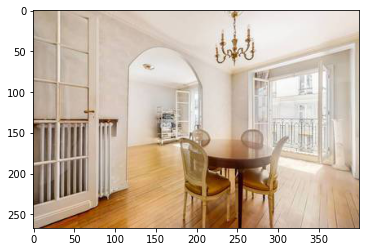

In [197]:
url=Imgs_Scr[3][0]
from skimage import io
import matplotlib.pyplot as plt

image = io.imread(url)
plt.imshow(image)
plt.show()

In [202]:
#Scr=
for i in range(len(images[0].find_all("img"))):
    print(images[0].find_all("img")[i].get("src"))


https://upload.pap.fr/photos/D48/QJQ7CZ0BL25B3XQ.thumb.jpg
https://upload.pap.fr/photos/D48/QJQ7GBKX412N2BV.thumb.jpg
https://upload.pap.fr/photos/D48/QJQ7GA1MOO60W6Q.thumb.jpg
https://upload.pap.fr/photos/D48/QJQ7GCDZWM0JLPS.thumb.jpg
https://upload.pap.fr/photos/D48/QJQ7GD8AHJ6VT3V.thumb.jpg
https://upload.pap.fr/photos/D48/QJQ7GAIPDR5S100.thumb.jpg
https://upload.pap.fr/photos/D48/QJQ7GEGUCK2VY49.thumb.jpg
https://upload.pap.fr/photos/D48/QJQ7GE6LCX6LSWJ.thumb.jpg
https://upload.pap.fr/photos/D48/QJQ7FW0NB65DAEO.thumb.jpg
https://upload.pap.fr/photos/D48/QJQ7GDIYSX3OFLY.thumb.jpg
